<a href="https://colab.research.google.com/github/AndreyV80/NetStudy/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os, time
from google.colab import drive
import seaborn as sns

In [2]:
drive.mount('/content/drive')    


Mounted at /content/drive



**Обязательная часть **
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

1. построить не менее 4 визуализаций различных видов; 
2. каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
3. по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Общий рейтинг,Страна или регион,Оценка,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода выбора,Щедрость,Восприятие коррупции

1. Загружаем датасет про уровень счастья

In [3]:
happiness = pd.read_csv('/content/drive/My Drive/2019.csv', sep = ',')
happiness.head(2)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


Проверяем структуру датасета

In [ ]:
happiness.info()

Основные статистические показатели датасета

In [4]:
happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

2. Проверяем соотношение ранга и оценки

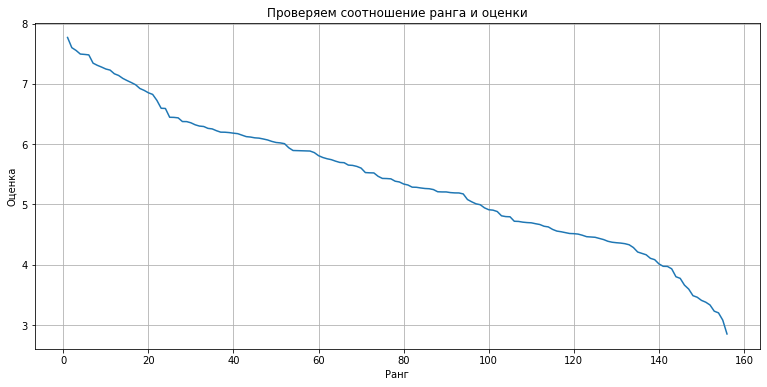

In [17]:
plt.plot(happiness['Overall rank'], happiness['Score'])
plt.title('Проверяем соотношение ранга и оценки')
plt.xlabel('Ранг')
plt.ylabel('Оценка')
plt.grid()
plt.show()

Как видим ранг связан со значением оценки.

3. Рассмотрим распределение оценок

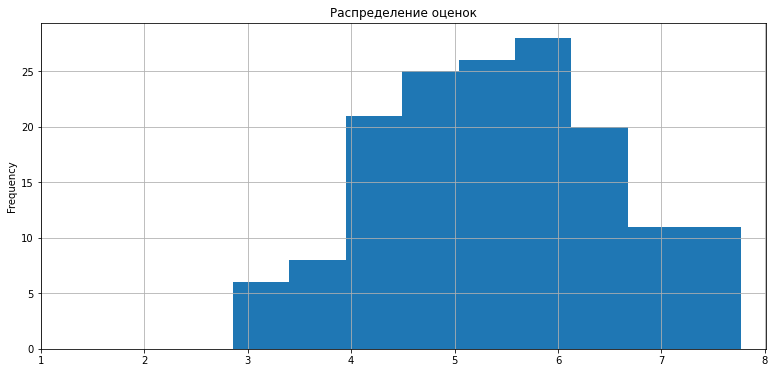

In [ ]:
happiness.Score.plot(kind='hist', 
                     bins=9,
                     title='Распределение оценок',
                     xlabel='Оценка',
                     grid = True,
                     xticks=range(1, 9))

Можно увидеть равномерное распределение оценок с 4 по 6 и резкие перепады с 6 по 7

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение оценки счастья')

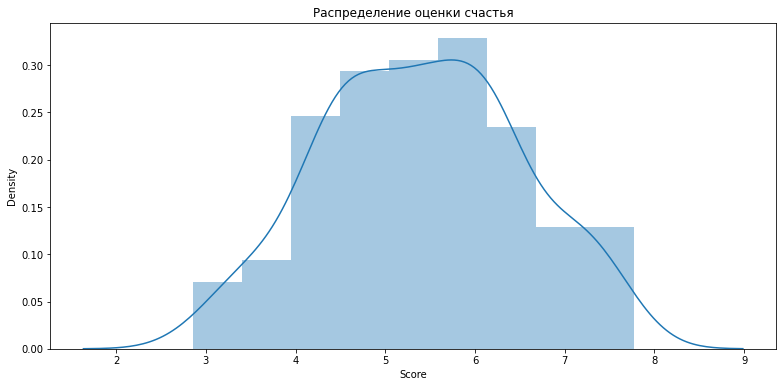

In [11]:
ax = sns.distplot(happiness.Score)
ax.set_title('Распределение оценки счастья')

4. Предполагаю, что для оценки уровня счастья ключевыми были показатели, непосредственно связанные с гражданами и это материальная составляющая. Рассмотрим как связаны между собой различные признаки в наборе данных

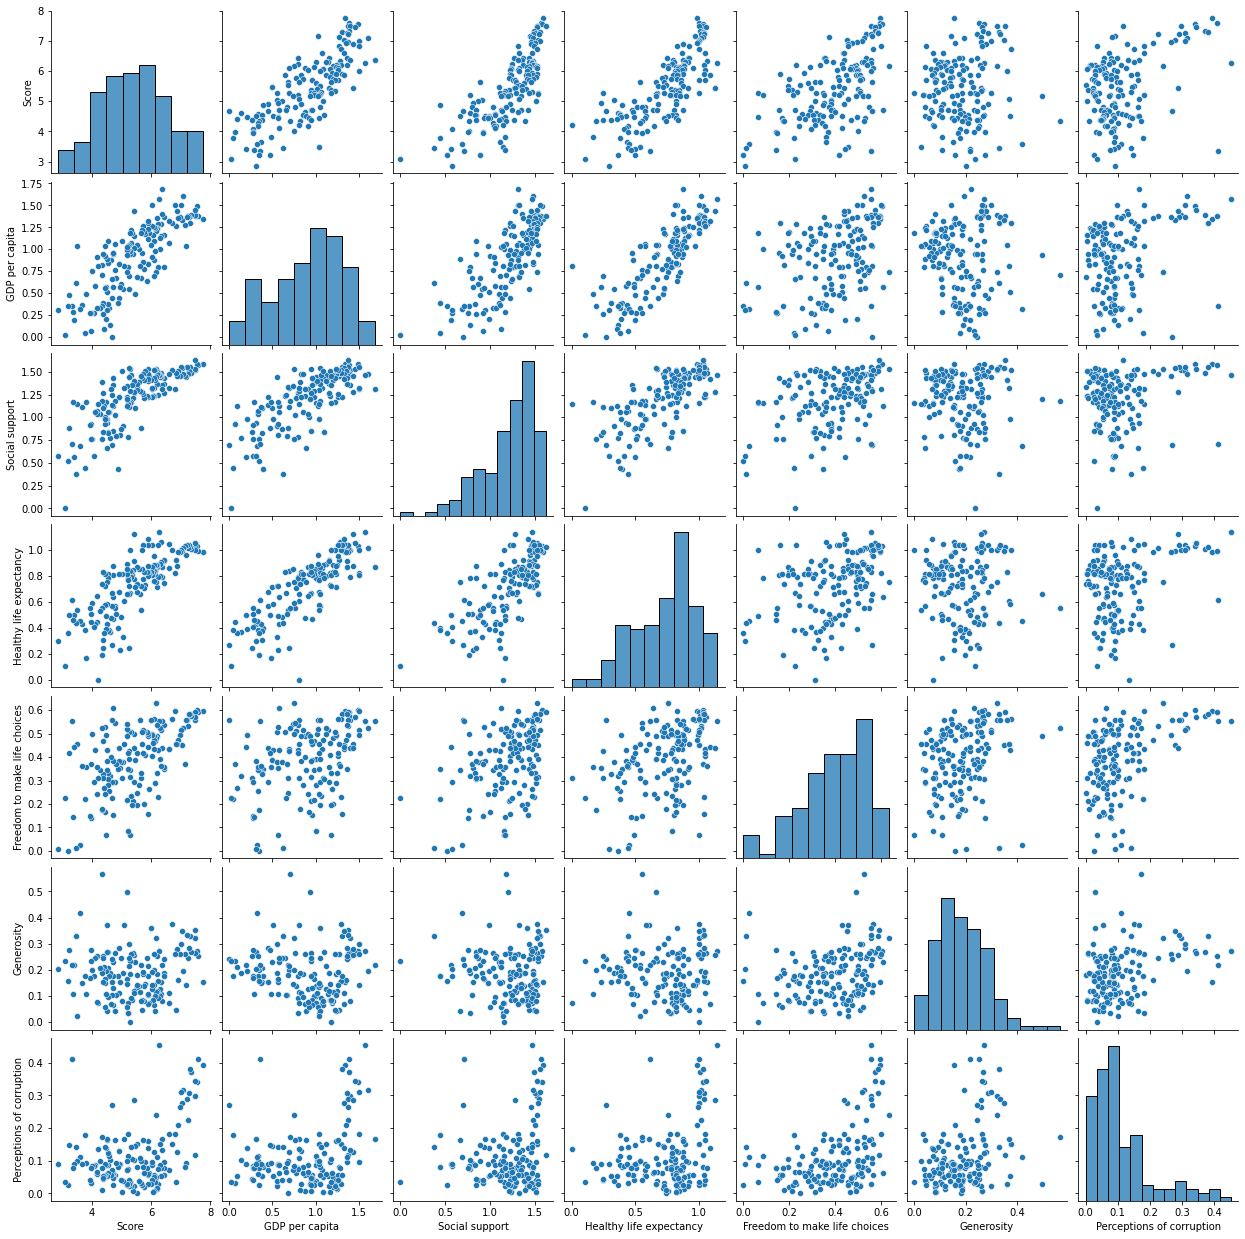

In [7]:
sns.pairplot(happiness[['Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']])
#happiness[['Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]

1. Как видим у стран с высота оценки уровня счастья напрямую зависит от увеличения благосостояния как государства, так и граждан, социальная направленность политики государства.
2. Позиции, связанные со свободой выбора, щедрость, имеют большой разброс. Считаю, данныепоказатели не особо повлияли на общую оценку счастья.
3. Стоит отметить, что у стран с высоким рейтингом наблюдается высокий уровень коррупции, по сравнению с странами со средними показателями.
